In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

In [26]:
import pandas as pd
import numpy as np

# Configuração para exibir todas as linhas do DataFrame
pd.set_option('display.max_rows', None)

# Coletando dados do arquivo Excel
df = pd.read_excel('C:/Users/Meu Computador/Documents/Tubaroes/RJ_Reconstrucao_Tubaroes_2024_11_04.xlsx')

# Exibindo as primeiras linhas do DataFrame para verificar o carregamento
print("Dados do arquivo Excel:")
print(df.head())

# Selecionando as colunas de interesse (sem remover linhas com valores ausentes)
df_Pescadas = df[['Ano', 'Cacao_art', 'Cacao_ind', 'Cacao_art_ind', 'Cacao_anequim_art', 'Cacao_anequim_ind', 'Cacao_azul_art']].reset_index(drop=True)

# Verificando se o DataFrame `df_Pescadas` contém dados
if df_Pescadas.empty:
    print("Tabela vazia após seleção de colunas.")
else:
    print("Dados carregados e selecionados corretamente:")
    print(df_Pescadas.head())

# Calculando a soma das colunas selecionadas para cada linha e armazenando na nova coluna 'Soma'
# Ignorando valores NaN durante a soma
df_Pescadas['Soma'] = df_Pescadas[['Cacao_art', 'Cacao_ind', 'Cacao_art_ind', 'Cacao_anequim_art', 'Cacao_anequim_ind', 'Cacao_azul_art']].sum(axis=1, skipna=True)

# Removendo linhas onde 'Soma' é zero ou NaN, pois essas linhas não contêm dados úteis para análise
df_Pescadas = df_Pescadas[df_Pescadas['Soma'] > 0]

# Selecionando as colunas de interesse para análise e criando o DataFrame `dados`
dados = df_Pescadas[['Ano', 'Cacao_ind', 'Soma']]

# Calculando a proporção da coluna 'Cacao_ind' em relação à coluna 'Soma'
dados['Prop_Cacao_ind'] = dados['Cacao_ind'] / dados['Soma']

# Exibindo o DataFrame final com todas as linhas
print("Dados finais com a proporção calculada para todos os anos:")
print(dados)

# Para fins de predição, organizando e concatenando os anos conforme necessário
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([
    1962, 1963, 1964, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1975, 
    1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
    1988, 1989, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008
])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

# Extraindo os valores de proporção para uso posterior
prop = dados['Prop_Cacao_ind'].values
dados.head()
print(dados.head(20))


Dados do arquivo Excel:
    Ano  Cacao_art  Cacao_ind  Cacao_art_ind  Cacao_anequim_art  \
0  1950        NaN        NaN            NaN                NaN   
1  1951        NaN        NaN            NaN                NaN   
2  1952        NaN        NaN            NaN                NaN   
3  1953        NaN        NaN            NaN                NaN   
4  1954        NaN        NaN            NaN                NaN   

   Cacao_anequim_ind  Cacao_azul_art  Cacao_azul_ind  Cacao_machote_art  \
0                NaN             NaN             NaN                NaN   
1                NaN             NaN             NaN                NaN   
2                NaN             NaN             NaN                NaN   
3                NaN             NaN             NaN                NaN   
4                NaN             NaN             NaN                NaN   

   Cacao_machote_ind  ...  Cacao_raposa_ind  Cacao_tigre_art  Cacao_tigre_ind  \
0                NaN  ...               N

C:\Users\Meu Computador\AppData\Local\Temp\ipykernel_15712\1621208482.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Prop_Cacao_ind'] = dados['Cacao_ind'] / dados['Soma']


In [23]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std


In [15]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=20, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Desagregações Pescada_art 1962-2008/pesos prop Pesc_amarela_art/.weights.h5', overwrite=True)

Epoch 1/20


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9791
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9250
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8837
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8432
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8012
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7550
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7051
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6553
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6059
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5611
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5215
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4865
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4546
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4283
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4086
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/st

In [16]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Desagregações Pescada_art 1962-2008/pesos prop Pesc_amarela_art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


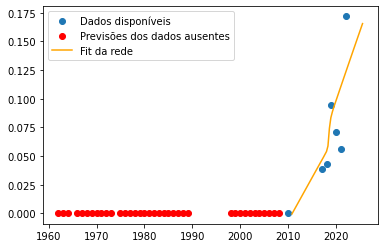

In [17]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

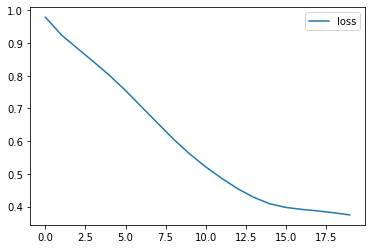

In [18]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [20]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_Pesc_amarela_art',prev_continua)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
